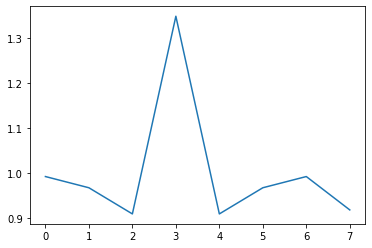

<function __main__.odc(l=8, t0=-2.0, t1=-2.5, e1=-2.0)>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def mapindex(check,l):
    tmp = []
    [[tmp.append((i,j)) for j in range(l) if check[i,j]] for i in range(l)]
    tmp = np.array(tmp).T
    return tuple([tuple(tmp[0]),tuple(tmp[1])])

def odc(l=8, t0=-2., t1=-2.5, e1=-2.):
    k   = int(0.5*l) - 1
    a   = np.zeros((l,l))
    a[tuple([tuple(list(range(l))+list(range(-1,l-1))),tuple(list(range(-1,l-1))+list(range(l)))])] = t0
    a[tuple([(k+1,k-1,k,k),(k,k,k+1,k-1)])] = t1 
    a[k,k]=e1
    f   = np.array([ [ ir*ic  for ir in [ np.any(ja!=0) for ja in a.T ]  ] for ic in [ np.any(ia!=0) for ia in a] ])
    d   = [i for i in range(l) if f[i,i]]
    mi  = mapindex(f,l)
    #mi  = map(list,zip(*mi)))
    ll  = int(np.sqrt(len(mi[0])))
    x   = a[mi].reshape((ll,ll))
    e,q = np.linalg.eig(x)
    uu  = (q*q).T
    kk  = int(np.ceil(np.shape(x)[0]/2)) - 1 
    if kk != 0:
        if len(d)%2 == 0:
            rho =[2.0*sum(itu) for itu in uu[:kk+1,:].T]
        else :
            rho =[2.0*sum(itu[:-1]) + itu[-1] for itu in uu[:kk+1,:].T]
    else:
        rho = [1]
    den = np.ones(l)
    for ind, dd in enumerate(d):
        den[dd] = rho[ind] 
    plt.plot(den)
    plt.show()
interact(odc,l=(2,100,2),t0=(-10.,0.,0.1), t1=(-10.,0.,0.1),e1=(-10.,0.,0.1))